#Simple Linear Regression



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

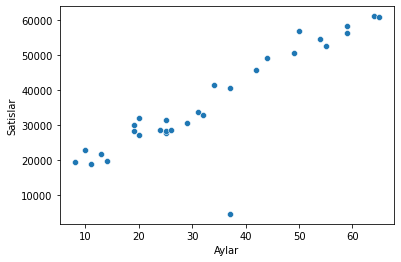

In [ ]:
#Veriyi içe aktarıp inceleme
data = pd.read_csv("satislar.csv")
sns.scatterplot(x="Aylar",y="Satislar",data=data);

In [ ]:
months = data[["Aylar"]]
months

,Aylar
0,8
1,10
2,11
3,13
4,14
5,19
6,19
7,20
8,20
9,24


In [ ]:
sales = data[["Satislar"]]
sales

,Satislar
0,19671.5
1,23102.5
2,18865.5
3,21762.5
4,19945.5
5,28321.0
6,30075.0
7,27222.5
8,32222.5
9,28594.5


In [ ]:
#veriyi test ve train olarak bölme
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(months,sales,test_size=0.33,random_state=0)
x_train

,Aylar
5,19
16,32
8,20
14,29
23,50
20,42
1,10
29,65
6,19
4,14


In [ ]:
#verileri standartlaştırma
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [ ]:
#lineer regresyonu uygulama
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,Y_train)

In [ ]:
Y_predict = model.predict(X_test)
Y_predict

array([[-1.33324088],
       [ 1.05398097],
       [-0.65761206],
       [-0.70265398],
       [ 0.82877136],
       [ 0.60356175],
       [ 0.82877136],
       [-0.70265398],
       [-0.29727668],
       [ 0.37835214]])

In [ ]:
#lineer regresyonu uygulama
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([[20126.21865404],
       [57740.29412655],
       [30771.7117123 ],
       [30062.01217508],
       [54191.79644047],
       [50643.29875438],
       [54191.79644047],
       [30062.01217508],
       [36449.30801003],
       [47094.80106829]])

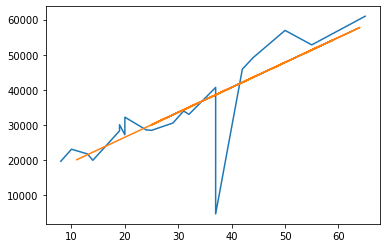

In [ ]:
#modeli görselleştirme
x_train = x_train.sort_index()
y_train = y_train.sort_index()
plt.plot(x_train,y_train)
plt.plot(x_test,y_predict);

#Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Veriyi içe aktarma
data = pd.read_csv("veriler.csv")
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender = data.iloc[:,-1:].values
gender[:,-1] = le.fit_transform(data.iloc[:,-1])
gender

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=object)

In [ ]:
#Böyle uğraşmak yerine binary bir değişkende label encoder zaten ayni işi görür.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
gender = ohe.fit_transform(gender).toarray()
gender

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
ohe = OneHotEncoder()
country = data.iloc[:,0:1].values
country = ohe.fit_transform(country).toarray()
country

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
result3 = pd.DataFrame(data=gender[:,:1],index=range(22),columns=['cinsiyet'])
result_data1 = pd.concat([data.iloc[:,:4],result3],axis=1)
country = pd.DataFrame(data= country,index=range(22),columns=["Fr","Tr","Us"])
result_data = pd.concat([country,result_data1.iloc[:,1:]],axis=1)
result_data

,Fr,Tr,Us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,1.0
1,0.0,1.0,0.0,125,36,11,1.0
2,0.0,1.0,0.0,135,34,10,0.0
3,0.0,1.0,0.0,133,30,9,0.0
4,0.0,1.0,0.0,129,38,12,1.0
5,0.0,1.0,0.0,180,90,30,1.0
6,0.0,1.0,0.0,190,80,25,1.0
7,0.0,1.0,0.0,175,90,35,1.0
8,0.0,1.0,0.0,177,60,22,0.0
9,0.0,0.0,1.0,185,105,33,1.0


In [ ]:
#Verilerin eğitim ve test olarak parçalanması
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(result_data.iloc[:,:6],result3,test_size=0.33,random_state=0)
x_train

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
height = result_data.iloc[:,3:4]
height

,boy
0,130
1,125
2,135
3,133
4,129
5,180
6,190
7,175
8,177
9,185


In [ ]:
left = result_data.iloc[:,0:3]
left
right = result_data.iloc[:,4:]
right
left

,Fr,Tr,Us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [ ]:
last_data = pd.concat([left,right],axis=1)
last_data

,Fr,Tr,Us,kilo,yas,cinsiyet
0,0.0,1.0,0.0,30,10,1.0
1,0.0,1.0,0.0,36,11,1.0
2,0.0,1.0,0.0,34,10,0.0
3,0.0,1.0,0.0,30,9,0.0
4,0.0,1.0,0.0,38,12,1.0
5,0.0,1.0,0.0,90,30,1.0
6,0.0,1.0,0.0,80,25,1.0
7,0.0,1.0,0.0,90,35,1.0
8,0.0,1.0,0.0,60,22,0.0
9,0.0,0.0,1.0,105,33,1.0


In [ ]:
#Verilerin eğitim ve test olarak parçalanması
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(last_data.iloc[:,:6],height,test_size=0.33,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([[182.26638686],
       [152.87161474],
       [162.79386375],
       [158.30668577],
       [130.82888952],
       [173.96138408],
       [150.12782663],
       [157.26898922]])

In [ ]:
#backward elimination
#OLS raporu oluşturma
import statsmodels.api as sm
X=np.append(arr=np.ones((22,1)).astype(int),values=result_data,axis=1)
X_l = result_data.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(height,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.915e+29
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          1.29e-229
Time:                        14:56:27   Log-Likelihood:                 631.11
No. Observations:                  22   AIC:                            -1250.
Df Residuals:                      16   BIC:                            -1244.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.705e-13   3.23e-13     -0.528      0.605   -8.56e-13    5.15e-13
x2         -2.274e-13   2.96e-13     -0.768      0.454   -8.55e-13       4e-13
x3         -1.563e-13   3.09e-13     -0.506      0.620   -8.11e-13    4.98e-13
x4             1.0000   2.67e-15   3.74e+14      0.000       1.000       1.000
x5          6.661e-16    2.3e-15      0.289      0.776   -4.21e-15    5.55e-15
x6         -1.554e-15   2.62e-15     -0.593      0.561   -7.11e-15       4e-15
==============================================================================
Omnibus:                        0.616   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.665
Skew:                           0.184   Prob(JB):                        0.717
Kurtosis:                       2.232   Cond. No.                     4.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#x5 yani 4. değişkeni atıyoruz p değeri çok yüksek.
X_l = result_data.iloc[:,[0,1,2,3,5]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(height,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.908e+28
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          1.94e-237
Time:                        15:00:28   Log-Likelihood:                 610.51
No. Observations:                  22   AIC:                            -1211.
Df Residuals:                      17   BIC:                            -1206.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.421e-13    5.1e-13     -0.279      0.784   -1.22e-12    9.33e-13
x2         -1.847e-13   4.51e-13     -0.410      0.687   -1.14e-12    7.67e-13
x3         -8.527e-14   4.86e-13     -0.175      0.863   -1.11e-12    9.41e-13
x4             1.0000   3.13e-15   3.19e+14      0.000       1.000       1.000
x5         -4.441e-16   6.48e-15     -0.069      0.946   -1.41e-14    1.32e-14
==============================================================================
Omnibus:                        0.214   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.415
Skew:                          -0.041   Prob(JB):                        0.813
Kurtosis:                       2.332   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#x5 yani son değişkeni atıyoruz p değeri çok yüksek.
X_l = result_data.iloc[:,[0,1,2,3]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(height,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.285e+29
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          2.09e-257
Time:                        15:00:53   Log-Likelihood:                 626.14
No. Observations:                  22   AIC:                            -1244.
Df Residuals:                      18   BIC:                            -1240.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -1.99e-13   2.43e-13     -0.818      0.424    -7.1e-13    3.12e-13
x2         -9.948e-14   2.12e-13     -0.469      0.645   -5.45e-13    3.46e-13
x3         -9.948e-14   2.31e-13     -0.430      0.672   -5.85e-13    3.86e-13
x4             1.0000   1.37e-15   7.32e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        7.942   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.936
Skew:                           0.805   Prob(JB):                        0.140
Kurtosis:                       1.695   Cond. No.                     2.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#x3 yani 2. değişkeni atıyoruz p değeri çok yüksek.
X_l = result_data.iloc[:,[0,1,3]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(height,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    boy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.024e+31
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                   5.80e-290
Time:                        15:01:41   Log-Likelihood:                          629.13
No. Observations:                  22   AIC:                                     -1252.
Df Residuals:                      19   BIC:                                     -1249.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.553e-14   5.62e-14     -0.633      0.535   -1.53e-13     8.2e-14
x2          -6.75e-14   4.92e-14     -1.372      0.186   -1.71e-13    3.55e-14
x3             1.0000   2.39e-16   4.18e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        8.310   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                2.161
Skew:                          -0.255   Prob(JB):                        0.339
Kurtosis:                       1.552   Cond. No.                         515.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#x1 yani 0. değişkeni atıyoruz p değeri çok yüksek.
X_l = result_data.iloc[:,[1,3]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(height,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    boy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.615e+32
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                   2.28e-317
Time:                        15:02:03   Log-Likelihood:                          658.50
No. Observations:                  22   AIC:                                     -1313.
Df Residuals:                      20   BIC:                                     -1311.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.553e-14   1.05e-14     -3.376      0.003   -5.75e-14   -1.36e-14
x2             1.0000   4.09e-17   2.45e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.592   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.657
Skew:                          -0.197   Prob(JB):                        0.720
Kurtosis:                       2.250   Cond. No.                         320.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Ödev
Humidity Tahmini

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("odev_tenis.csv")
data

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [ ]:
outlook = data.iloc[:,0:1].values
outlook
windy = data.windy.values
windy
play = data.play.values
play

array([['sunny'],
       ['sunny'],
       ['overcast'],
       ['rainy'],
       ['rainy'],
       ['rainy'],
       ['overcast'],
       ['sunny'],
       ['sunny'],
       ['rainy'],
       ['sunny'],
       ['overcast'],
       ['overcast'],
       ['rainy']], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
windy_encoded = LabelEncoder().fit_transform(windy)
windy_encoded
play_encoded = LabelEncoder().fit_transform(play)
play_encoded

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

outlook_encoded = OneHotEncoder().fit_transform(outlook).toarray()
outlook_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
outlookdf = pd.DataFrame(outlook_encoded)
windydf = pd.DataFrame(windy_encoded)
playdf = pd.DataFrame(play_encoded)
result_data = pd.concat([outlookdf,data.iloc[:,1:2],windydf,playdf],axis=1)
humidity = data[["humidity"]]

In [ ]:
result_data
humidity

,humidity
0,85
1,90
2,86
3,96
4,80
5,70
6,65
7,95
8,70
9,80


In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(result_data,humidity,test_size=0.33,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

16.476343933789288

In [ ]:
import statsmodels.api as sm
X=np.append(arr=np.ones((14,1)).astype(int),values=result_data,axis=1)
X_l = result_data.iloc[:,[0,1,2,3]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(humidity,X_l).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.8270
Date:                Mon, 19 Jul 2021   Prob (F-statistic):              0.509
Time:                        15:25:38   Log-Likelihood:                -50.425
No. Observations:                  14   AIC:                             108.8
Df Residuals:                      10   BIC:                             111.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            25.3137     37.580      0.674      0.516     -58.419     109.047
x2            33.4359     34.948      0.957      0.361     -44.434     111.306
x3            27.4547     38.097      0.721      0.488     -57.431     112.341
x4             0.7158      0.496      1.443      0.180      -0.390       1.821
==============================================================================
Omnibus:                        2.349   Durbin-Watson:                   2.548
Prob(Omnibus):                  0.309   Jarque-Bera (JB):                1.375
Skew:                           0.497   Prob(JB):                        0.503
Kurtosis:                       1.831   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_l = result_data.iloc[:,[1,2,3]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(humidity,X_l).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               humidity   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              297.8
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                    8.25e-11
Time:                        15:25:57   Log-Likelihood:                         -50.736
No. Observations:                  14   AIC:                                      107.5
Df Residuals:                      11   BIC:                                      109.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.3369      6.571      1.573      0.144      -4.125      24.799
x2             2.2377      6.888      0.325      0.751     -12.922      17.397
x3             1.0467      0.068     15.496      0.000       0.898       1.195
==============================================================================
Omnibus:                        1.854   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.380
Skew:                           0.607   Prob(JB):                        0.502
Kurtosis:                       2.055   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_l = result_data.iloc[:,[1,3]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(humidity,X_l).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               humidity   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              482.6
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                    3.43e-12
Time:                        15:26:12   Log-Likelihood:                         -50.802
No. Observations:                  14   AIC:                                      105.6
Df Residuals:                      12   BIC:                                      106.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.1920      5.335      1.723      0.111      -2.432      20.817
x2             1.0632      0.043     24.622      0.000       0.969       1.157
==============================================================================
Omnibus:                        1.753   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.356
Skew:                           0.631   Prob(JB):                        0.508
Kurtosis:                       2.143   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Polynomial Regression

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv("maaslar.csv")
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


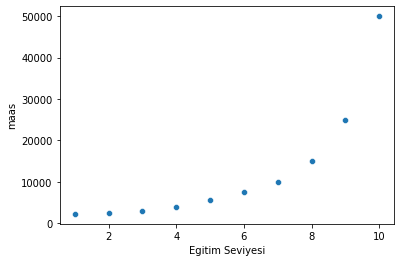

In [36]:
sns.scatterplot(x="Egitim Seviyesi",y="maas",data= data);

In [37]:
x= data[["Egitim Seviyesi"]]
y= data[["maas"]]
X=x.values
Y=y.values

##Linear Regression

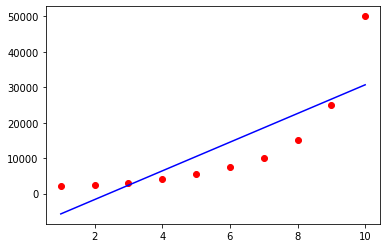

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,Y)
plt.scatter(X,Y,color="red")
plt.plot(x,model.predict(X),color="blue");

##Polynomial Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) #derecesi 2 olan bir polinom objesi
x_poly = poly_reg.fit_transform(X)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

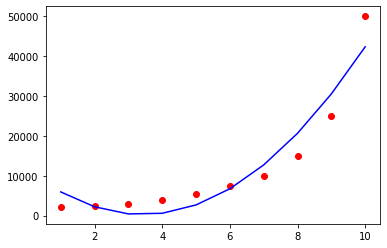

In [40]:
poly_model = LinearRegression().fit(x_poly,y)
plt.scatter(X,Y,color="red")
plt.plot(X,poly_model.predict(poly_reg.fit_transform(X)),color="blue")
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) #derecesi 4 olan bir polinom objesi
x_poly = poly_reg.fit_transform(X)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

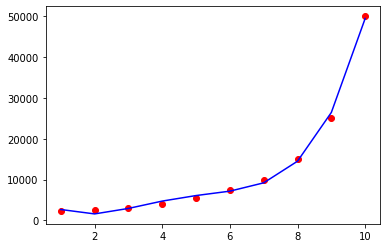

In [42]:
poly_model = LinearRegression().fit(x_poly,y)
plt.scatter(X,Y,color="red")
plt.plot(X,poly_model.predict(poly_reg.fit_transform(X)),color="blue")
plt.show()

#SVR
***Scaling is important since this algorithm is sensitive 
to outliers values.***


---

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv("maaslar.csv")
data
x= data[["Egitim Seviyesi"]]
y= data[["maas"]]
X=x.values
Y=y.values

In [45]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(Y)

In [46]:
from sklearn.svm import SVR
model = SVR(kernel="rbf").fit(x_scaled,y_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


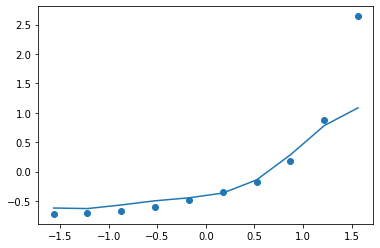

In [47]:
plt.scatter(x_scaled,y_scaled)
plt.plot(x_scaled,model.predict(x_scaled));

#Decision Tree

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [49]:
data = pd.read_csv("maaslar.csv")
data
x= data[["Egitim Seviyesi"]]
y= data[["maas"]]
X=x.values
Y=y.values

In [50]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0).fit(X,Y)

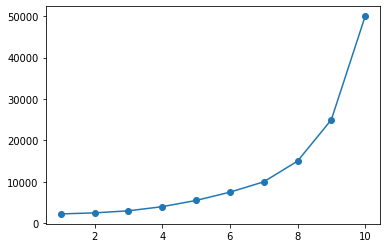

In [51]:
plt.scatter(X,Y)
plt.plot(X,model.predict(X));

#Random Forest

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [53]:
data = pd.read_csv("maaslar.csv")
data
x= data[["Egitim Seviyesi"]]
y= data[["maas"]]
X=x.values
Y=y.values

In [54]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,random_state=0).fit(X,Y.ravel())

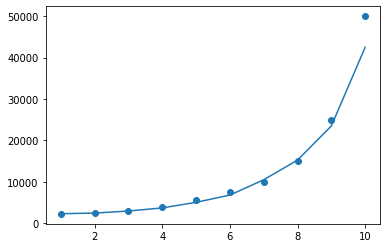

In [55]:
plt.scatter(X,Y)
plt.plot(X,model.predict(X));

#R Square

In [58]:
from sklearn.metrics import r2_score
r2_score(Y,model.predict(X))

0.9704434230386582

#Ödev

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data = pd.read_csv("maaslar_yeni.csv")
data.head()

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500


In [211]:
data.corr()

,UnvanSeviyesi,Kidem,Puan,maas
UnvanSeviyesi,1.000000,-0.125200,0.034948,0.727036
Kidem,-0.125200,1.000000,0.322796,0.117964
Puan,0.034948,0.322796,1.000000,0.201474
maas,0.727036,0.117964,0.201474,1.000000


In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Calisan ID,30.0,15.500000,8.803408,1.0,8.25,15.5,22.75,30.0
UnvanSeviyesi,30.0,5.500000,2.921384,1.0,3.00,5.5,8.00,10.0
Kidem,30.0,5.433333,2.686920,1.0,4.00,5.0,7.75,10.0
Puan,30.0,59.066667,25.330823,2.0,44.00,70.0,70.00,99.0
maas,30.0,10861.666667,13468.313281,2000.0,3000.00,5450.0,12000.00,60000.0


In [93]:
data.unvan.unique

<bound method Series.unique of 0                Cayci
1             Sekreter
2     Uzman Yardimcisi
3                Uzman
4     Proje Yoneticisi
5                  Sef
6                Mudur
7             Direktor
8              C-level
9                  CEO
10               Cayci
11            Sekreter
12    Uzman Yardimcisi
13               Uzman
14    Proje Yoneticisi
15                 Sef
16               Mudur
17            Direktor
18             C-level
19                 CEO
20               Cayci
21            Sekreter
22    Uzman Yardimcisi
23               Uzman
24    Proje Yoneticisi
25                 Sef
26               Mudur
27            Direktor
28             C-level
29                 CEO
Name: unvan, dtype: object>

In [94]:
data.isnull().sum()

Calisan ID       0
unvan            0
UnvanSeviyesi    0
Kidem            0
Puan             0
maas             0
dtype: int64

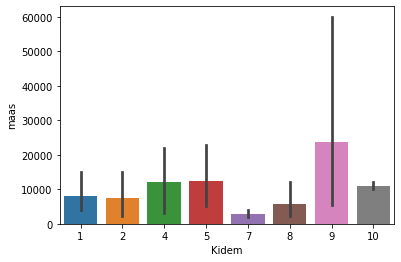

In [95]:
sns.barplot(x="Kidem",y="maas",data=data);

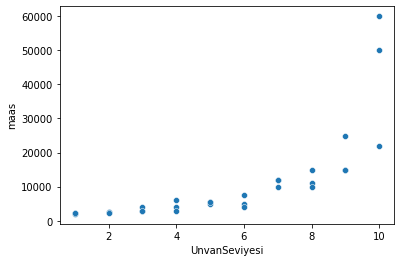

In [96]:
sns.scatterplot(x="UnvanSeviyesi",y="maas",data=data);

##Multiple Linear Regression

In [ ]:

dep = data.iloc[:,-1:]
indep = data.drop("maas",axis=1)

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(indep ,dep,test_size=0.33,random_state=42)


In [153]:
from sklearn.linear_model import LinearRegression
model_mlr = LinearRegression().fit(x_train,y_train)

In [141]:
y_pred = model_mlr.predict(x_test)

In [150]:
import statsmodels.api as sm
sm_model=sm.OLS(model.predict(x_test),x_test)
sm_model.fit().summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              69.48
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                    1.42e-05
Time:                        10:23:16   Log-Likelihood:                         -94.496
No. Observations:                  10   AIC:                                      195.0
Df Residuals:                       7   BIC:                                      195.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2544.1168    320.035      7.949      0.000    1787.353    3300.880
Kidem          1359.0752    430.813      3.155      0.016     340.364    2377.787
Puan           -144.3883     53.383     -2.705      0.030    -270.618     -18.159
==============================================================================
Omnibus:                        0.420   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.483
Skew:                          -0.179   Prob(JB):                        0.786
Kurtosis:                       1.985   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.41059223915968435

#Ploynomial Regression

In [168]:
indep = data[["Puan"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(indep ,dep,test_size=0.33,random_state=42)


In [169]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.fit_transform(x_test)

In [170]:
model_pr = LinearRegression().fit(x_poly,y_train)


In [171]:
y_pred = model_pr.predict(x_test_poly)

In [172]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.1851560012178748

In [173]:
import statsmodels.api as sm
sm_model=sm.OLS(model_pr.predict(poly_reg.fit_transform(x_test)),x_test)
sm_model.fit().summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              89.78
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                    5.59e-06
Time:                        10:31:54   Log-Likelihood:                         -94.079
No. Observations:                  10   AIC:                                      190.2
Df Residuals:                       9   BIC:                                      190.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Puan         146.5075     15.462      9.475      0.000     111.530     181.485
==============================================================================
Omnibus:                        0.019   Durbin-Watson:                   2.607
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.144
Skew:                           0.003   Prob(JB):                        0.930
Kurtosis:                       2.411   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#SVR

In [186]:
indep = data.iloc[:,0:3]
dep = data[["maas"]]
#indep.drop("Kidem",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(indep,dep,test_size=0.33,random_state=42)

In [188]:
from sklearn.svm import SVR
model_svr = SVR().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [189]:
y_pred = model_svr.predict(x_test)

In [190]:
import statsmodels.api as sm
sm_model=sm.OLS(model_svr.predict(x_test),x_test)
sm_model.fit().summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              110.8
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                    1.48e-06
Time:                        10:41:48   Log-Likelihood:                         -81.527
No. Observations:                  10   AIC:                                      167.1
Df Residuals:                       8   BIC:                                      167.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi   210.1631     81.751      2.571      0.033      21.646     398.680
Puan             49.1060      8.883      5.528      0.001      28.621      69.590
==============================================================================
Omnibus:                        1.110   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.655
Skew:                           0.018   Prob(JB):                        0.721
Kurtosis:                       1.747   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Decision Tree

In [199]:
indep = data.iloc[:,0:3]
dep = data[["maas"]]
#indep.drop("Puan",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [200]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(indep,dep,test_size=0.33,random_state=42)

In [201]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor().fit(x_train,y_train)

In [202]:
import statsmodels.api as sm
sm_model=sm.OLS(model_dt.predict(x_test),x_test)
sm_model.fit().summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              66.36
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                    1.04e-05
Time:                        10:46:35   Log-Likelihood:                         -93.842
No. Observations:                  10   AIC:                                      191.7
Df Residuals:                       8   BIC:                                      192.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  1833.9576    226.899      8.083      0.000    1310.728    2357.187
Kidem          -199.6948    245.637     -0.813      0.440    -766.135     366.745
==============================================================================
Omnibus:                        1.959   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                0.307
Skew:                          -0.393   Prob(JB):                        0.858
Kurtosis:                       3.344   Cond. No.                         2.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Random Forests

In [207]:
indep = data.iloc[:,0:3]
dep = data[["maas"]]
#indep.drop("Puan",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [208]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(indep,dep,test_size=0.33,random_state=42)

In [209]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [210]:
import statsmodels.api as sm
sm_model=sm.OLS(model_rf.predict(x_test),x_test)
sm_model.fit().summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              49.63
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                    3.10e-05
Time:                        10:49:23   Log-Likelihood:                         -98.557
No. Observations:                  10   AIC:                                      201.1
Df Residuals:                       8   BIC:                                      201.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  1703.7954    363.581      4.686      0.002     865.376    2542.215
Kidem           845.4436    393.607      2.148      0.064     -62.217    1753.104
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.707
Skew:                          -0.128   Prob(JB):                        0.702
Kurtosis:                       1.723   Cond. No.                         2.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""